In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import keras
import keras.backend as K
from keras.layers import Conv1D, MaxPool1D, Dropout, UpSampling1D, Input, Flatten, Dense
from keras.models import *
from keras import optimizers
from keras.layers.merge import concatenate
from keras.callbacks import *

Using TensorFlow backend.
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
model = Sequential()

model.add(Conv1D(16, 3, activation = 'relu', input_shape = (228, 1)))
model.add(MaxPool1D(2, 2))
model.add(Conv1D(32, 2, activation = 'relu'))
model.add(MaxPool1D(2, 2))
model.add(Conv1D(64, 3, activation = 'relu'))
model.add(MaxPool1D(2, 2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(9, activation='softmax'))

In [3]:
adam = optimizers.Adam(0.0001, 0.9, 0.99)
model.compile(adam, 'categorical_crossentropy', ['accuracy'])

In [4]:
reduce_lr = callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.2, patience=3, min_lr=0.0001)

In [5]:
temp = np.load('./Data/Training data/training.npz')
X_data = temp['xdata']
y_true = temp['ytrue']
y_hot = np.zeros((len(y_true), 9))
y_hot[np.arange(len(y_true)), y_true] = 1
X_train, X_test, y_train, y_test = train_test_split(X_data, y_hot)

In [6]:
history = model.fit(X_train, y_train, 64, 2000, 1, [reduce_lr], validation_data=(X_test, y_test))


Train on 1018 samples, validate on 340 samples
Epoch 1/2000
1018/1018 [==============================] - 1s 1ms/step - loss: 2497.9269 - accuracy: 0.1012 - val_loss: 947.1591 - val_accuracy: 0.0794
Epoch 2/2000
1018/1018 [==============================] - 0s 82us/step - loss: 412.9120 - accuracy: 0.1326 - val_loss: 181.7088 - val_accuracy: 0.2471
Epoch 3/2000
1018/1018 [==============================] - 0s 77us/step - loss: 203.0801 - accuracy: 0.2348 - val_loss: 192.2118 - val_accuracy: 0.1971
Epoch 4/2000
1018/1018 [==============================] - 0s 77us/step - loss: 138.1819 - accuracy: 0.2525 - val_loss: 182.2877 - val_accuracy: 0.2559
Epoch 5/2000
1018/1018 [==============================] - 0s 80us/step - loss: 137.3322 - accuracy: 0.2466 - val_loss: 179.7595 - val_accuracy: 0.2647
Epoch 6/2000
1018/1018 [==============================] - 0s 78us/step - loss: 147.2394 - accuracy: 0.2662 - val_loss: 156.5360 - val_accuracy: 0.2382
Epoch 7/2000
1018/1018 [======================

Epoch 54/2000
1018/1018 [==============================] - 0s 81us/step - loss: 32.8151 - accuracy: 0.5305 - val_loss: 45.4071 - val_accuracy: 0.5206
Epoch 55/2000
1018/1018 [==============================] - 0s 81us/step - loss: 30.3899 - accuracy: 0.5442 - val_loss: 40.5493 - val_accuracy: 0.5500
Epoch 56/2000
1018/1018 [==============================] - 0s 76us/step - loss: 27.1402 - accuracy: 0.5884 - val_loss: 47.8472 - val_accuracy: 0.4706
Epoch 57/2000
1018/1018 [==============================] - 0s 77us/step - loss: 77.5682 - accuracy: 0.4411 - val_loss: 127.5582 - val_accuracy: 0.3206
Epoch 58/2000
1018/1018 [==============================] - 0s 82us/step - loss: 62.2896 - accuracy: 0.4558 - val_loss: 48.3586 - val_accuracy: 0.4882
Epoch 59/2000
1018/1018 [==============================] - 0s 85us/step - loss: 54.0175 - accuracy: 0.5138 - val_loss: 77.4897 - val_accuracy: 0.4206
Epoch 60/2000
1018/1018 [==============================] - 0s 81us/step - loss: 54.0229 - accuracy:

1018/1018 [==============================] - 0s 81us/step - loss: 23.0499 - accuracy: 0.6248 - val_loss: 28.7394 - val_accuracy: 0.6324
Epoch 109/2000
1018/1018 [==============================] - 0s 78us/step - loss: 28.5224 - accuracy: 0.6012 - val_loss: 33.5564 - val_accuracy: 0.5265
Epoch 110/2000
1018/1018 [==============================] - 0s 80us/step - loss: 23.8251 - accuracy: 0.6012 - val_loss: 28.9866 - val_accuracy: 0.6529
Epoch 111/2000
1018/1018 [==============================] - 0s 85us/step - loss: 16.9001 - accuracy: 0.6562 - val_loss: 21.1807 - val_accuracy: 0.6941
Epoch 112/2000
1018/1018 [==============================] - 0s 76us/step - loss: 13.6809 - accuracy: 0.6857 - val_loss: 23.5326 - val_accuracy: 0.6559
Epoch 113/2000
1018/1018 [==============================] - 0s 76us/step - loss: 13.2999 - accuracy: 0.6719 - val_loss: 27.4447 - val_accuracy: 0.6353
Epoch 114/2000
1018/1018 [==============================] - 0s 79us/step - loss: 15.2066 - accuracy: 0.6699 -

1018/1018 [==============================] - 0s 78us/step - loss: 15.9974 - accuracy: 0.6660 - val_loss: 45.6210 - val_accuracy: 0.5059
Epoch 163/2000
1018/1018 [==============================] - 0s 81us/step - loss: 13.4384 - accuracy: 0.6631 - val_loss: 18.8674 - val_accuracy: 0.6971
Epoch 164/2000
1018/1018 [==============================] - 0s 77us/step - loss: 15.2167 - accuracy: 0.6857 - val_loss: 36.3790 - val_accuracy: 0.5882
Epoch 165/2000
1018/1018 [==============================] - 0s 77us/step - loss: 17.9355 - accuracy: 0.6356 - val_loss: 33.1957 - val_accuracy: 0.5853
Epoch 166/2000
1018/1018 [==============================] - 0s 79us/step - loss: 20.1070 - accuracy: 0.6130 - val_loss: 35.7467 - val_accuracy: 0.6294
Epoch 167/2000
1018/1018 [==============================] - 0s 84us/step - loss: 15.7011 - accuracy: 0.6562 - val_loss: 20.2348 - val_accuracy: 0.6441
Epoch 168/2000
1018/1018 [==============================] - 0s 79us/step - loss: 10.7460 - accuracy: 0.6994 -

1018/1018 [==============================] - 0s 80us/step - loss: 6.1283 - accuracy: 0.7475 - val_loss: 9.4073 - val_accuracy: 0.7824
Epoch 217/2000
1018/1018 [==============================] - 0s 80us/step - loss: 3.3975 - accuracy: 0.8261 - val_loss: 11.4202 - val_accuracy: 0.7971
Epoch 218/2000
1018/1018 [==============================] - 0s 74us/step - loss: 4.6572 - accuracy: 0.7849 - val_loss: 11.0614 - val_accuracy: 0.7824
Epoch 219/2000
1018/1018 [==============================] - 0s 69us/step - loss: 12.6924 - accuracy: 0.6749 - val_loss: 21.8885 - val_accuracy: 0.6029
Epoch 220/2000
1018/1018 [==============================] - 0s 76us/step - loss: 8.5870 - accuracy: 0.7328 - val_loss: 17.4097 - val_accuracy: 0.6765
Epoch 221/2000
1018/1018 [==============================] - 0s 77us/step - loss: 5.9609 - accuracy: 0.7731 - val_loss: 12.0352 - val_accuracy: 0.7118
Epoch 222/2000
1018/1018 [==============================] - 0s 74us/step - loss: 4.4587 - accuracy: 0.7967 - val_lo

Epoch 271/2000
1018/1018 [==============================] - 0s 78us/step - loss: 3.5563 - accuracy: 0.7947 - val_loss: 6.5014 - val_accuracy: 0.8265
Epoch 272/2000
1018/1018 [==============================] - 0s 81us/step - loss: 3.6877 - accuracy: 0.7849 - val_loss: 7.5080 - val_accuracy: 0.7118
Epoch 273/2000
1018/1018 [==============================] - 0s 80us/step - loss: 7.0345 - accuracy: 0.7230 - val_loss: 11.8669 - val_accuracy: 0.6353
Epoch 274/2000
1018/1018 [==============================] - 0s 93us/step - loss: 4.3787 - accuracy: 0.7731 - val_loss: 10.2947 - val_accuracy: 0.6941
Epoch 275/2000
1018/1018 [==============================] - 0s 65us/step - loss: 3.1816 - accuracy: 0.8045 - val_loss: 7.6667 - val_accuracy: 0.7794
Epoch 276/2000
1018/1018 [==============================] - 0s 66us/step - loss: 4.2942 - accuracy: 0.7544 - val_loss: 10.2554 - val_accuracy: 0.7765
Epoch 277/2000
1018/1018 [==============================] - 0s 78us/step - loss: 4.2924 - accuracy: 0.8

Epoch 326/2000
1018/1018 [==============================] - 0s 81us/step - loss: 3.2668 - accuracy: 0.7790 - val_loss: 7.7967 - val_accuracy: 0.6676
Epoch 327/2000
1018/1018 [==============================] - 0s 75us/step - loss: 2.8007 - accuracy: 0.8163 - val_loss: 5.0872 - val_accuracy: 0.7500
Epoch 328/2000
1018/1018 [==============================] - 0s 74us/step - loss: 2.0035 - accuracy: 0.8232 - val_loss: 5.2732 - val_accuracy: 0.7882
Epoch 329/2000
1018/1018 [==============================] - 0s 83us/step - loss: 2.7151 - accuracy: 0.8084 - val_loss: 6.1523 - val_accuracy: 0.7118
Epoch 330/2000
1018/1018 [==============================] - 0s 79us/step - loss: 2.2109 - accuracy: 0.8193 - val_loss: 4.9565 - val_accuracy: 0.7941
Epoch 331/2000
1018/1018 [==============================] - 0s 78us/step - loss: 2.2077 - accuracy: 0.8026 - val_loss: 6.9829 - val_accuracy: 0.7294
Epoch 332/2000
1018/1018 [==============================] - 0s 81us/step - loss: 3.8463 - accuracy: 0.7593

Epoch 381/2000
1018/1018 [==============================] - 0s 78us/step - loss: 2.3241 - accuracy: 0.7888 - val_loss: 4.3399 - val_accuracy: 0.7912
Epoch 382/2000
1018/1018 [==============================] - 0s 80us/step - loss: 2.0742 - accuracy: 0.7996 - val_loss: 3.5837 - val_accuracy: 0.8588
Epoch 383/2000
1018/1018 [==============================] - 0s 75us/step - loss: 1.3373 - accuracy: 0.8507 - val_loss: 4.5156 - val_accuracy: 0.7912
Epoch 384/2000
1018/1018 [==============================] - 0s 77us/step - loss: 1.6064 - accuracy: 0.8409 - val_loss: 3.5454 - val_accuracy: 0.8618
Epoch 385/2000
1018/1018 [==============================] - 0s 75us/step - loss: 1.8728 - accuracy: 0.8271 - val_loss: 6.3756 - val_accuracy: 0.7000
Epoch 386/2000
1018/1018 [==============================] - 0s 77us/step - loss: 1.9697 - accuracy: 0.8114 - val_loss: 4.3936 - val_accuracy: 0.7882
Epoch 387/2000
1018/1018 [==============================] - 0s 87us/step - loss: 3.0172 - accuracy: 0.7603

Epoch 436/2000
1018/1018 [==============================] - 0s 74us/step - loss: 1.5726 - accuracy: 0.8301 - val_loss: 2.7960 - val_accuracy: 0.8971
Epoch 437/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.8760 - accuracy: 0.8890 - val_loss: 3.1054 - val_accuracy: 0.8588
Epoch 438/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.9367 - accuracy: 0.8792 - val_loss: 2.8465 - val_accuracy: 0.8412
Epoch 439/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.8699 - accuracy: 0.8782 - val_loss: 3.2326 - val_accuracy: 0.8088
Epoch 440/2000
1018/1018 [==============================] - 0s 76us/step - loss: 1.2986 - accuracy: 0.8340 - val_loss: 3.0192 - val_accuracy: 0.8588
Epoch 441/2000
1018/1018 [==============================] - 0s 85us/step - loss: 1.4100 - accuracy: 0.8291 - val_loss: 3.2834 - val_accuracy: 0.7853
Epoch 442/2000
1018/1018 [==============================] - 0s 79us/step - loss: 1.6876 - accuracy: 0.8202

Epoch 491/2000
1018/1018 [==============================] - 0s 73us/step - loss: 1.5195 - accuracy: 0.8330 - val_loss: 2.3015 - val_accuracy: 0.8324
Epoch 492/2000
1018/1018 [==============================] - 0s 79us/step - loss: 1.0545 - accuracy: 0.8428 - val_loss: 3.0853 - val_accuracy: 0.8441
Epoch 493/2000
1018/1018 [==============================] - 0s 77us/step - loss: 1.4938 - accuracy: 0.8418 - val_loss: 3.1473 - val_accuracy: 0.7971
Epoch 494/2000
1018/1018 [==============================] - 0s 81us/step - loss: 1.0178 - accuracy: 0.8546 - val_loss: 2.5891 - val_accuracy: 0.8412
Epoch 495/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.9188 - accuracy: 0.8635 - val_loss: 3.8438 - val_accuracy: 0.7647
Epoch 496/2000
1018/1018 [==============================] - 0s 78us/step - loss: 1.6654 - accuracy: 0.7986 - val_loss: 2.8173 - val_accuracy: 0.8118
Epoch 497/2000
1018/1018 [==============================] - 0s 77us/step - loss: 1.0378 - accuracy: 0.8389

Epoch 546/2000
1018/1018 [==============================] - 0s 73us/step - loss: 1.0024 - accuracy: 0.8477 - val_loss: 2.0291 - val_accuracy: 0.8853
Epoch 547/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.4520 - accuracy: 0.9116 - val_loss: 2.1728 - val_accuracy: 0.8912
Epoch 548/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.5318 - accuracy: 0.8978 - val_loss: 3.3903 - val_accuracy: 0.7441
Epoch 549/2000
1018/1018 [==============================] - 0s 73us/step - loss: 0.4528 - accuracy: 0.9077 - val_loss: 2.0509 - val_accuracy: 0.8412
Epoch 550/2000
1018/1018 [==============================] - 0s 74us/step - loss: 0.7964 - accuracy: 0.8733 - val_loss: 2.3173 - val_accuracy: 0.8912
Epoch 551/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.8334 - accuracy: 0.8733 - val_loss: 2.9196 - val_accuracy: 0.7971
Epoch 552/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.7572 - accuracy: 0.8615

Epoch 601/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.4804 - accuracy: 0.8988 - val_loss: 1.8817 - val_accuracy: 0.8824
Epoch 602/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.6830 - accuracy: 0.8919 - val_loss: 3.2337 - val_accuracy: 0.7559
Epoch 603/2000
1018/1018 [==============================] - 0s 76us/step - loss: 0.7903 - accuracy: 0.8576 - val_loss: 2.9119 - val_accuracy: 0.7912
Epoch 604/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.6522 - accuracy: 0.8900 - val_loss: 2.1321 - val_accuracy: 0.8735
Epoch 605/2000
1018/1018 [==============================] - 0s 87us/step - loss: 0.4507 - accuracy: 0.9067 - val_loss: 2.5986 - val_accuracy: 0.8265
Epoch 606/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.5969 - accuracy: 0.8910 - val_loss: 2.9433 - val_accuracy: 0.7353
Epoch 607/2000
1018/1018 [==============================] - 0s 75us/step - loss: 0.7237 - accuracy: 0.8713

Epoch 656/2000
1018/1018 [==============================] - 0s 74us/step - loss: 0.3226 - accuracy: 0.9244 - val_loss: 2.3363 - val_accuracy: 0.8618
Epoch 657/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.5460 - accuracy: 0.9018 - val_loss: 2.9145 - val_accuracy: 0.7706
Epoch 658/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.4353 - accuracy: 0.9008 - val_loss: 1.9973 - val_accuracy: 0.8765
Epoch 659/2000
1018/1018 [==============================] - 0s 75us/step - loss: 0.6038 - accuracy: 0.8831 - val_loss: 1.8540 - val_accuracy: 0.8912
Epoch 660/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.4836 - accuracy: 0.8900 - val_loss: 2.2764 - val_accuracy: 0.8529
Epoch 661/2000
1018/1018 [==============================] - 0s 74us/step - loss: 0.2568 - accuracy: 0.9303 - val_loss: 2.1084 - val_accuracy: 0.8618
Epoch 662/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.4370 - accuracy: 0.9155

Epoch 711/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.2011 - accuracy: 0.9371 - val_loss: 2.0108 - val_accuracy: 0.8971
Epoch 712/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.2451 - accuracy: 0.9303 - val_loss: 2.2039 - val_accuracy: 0.8941
Epoch 713/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.3086 - accuracy: 0.9273 - val_loss: 1.8650 - val_accuracy: 0.9000
Epoch 714/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.3561 - accuracy: 0.9204 - val_loss: 1.9008 - val_accuracy: 0.8971
Epoch 715/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.3173 - accuracy: 0.9263 - val_loss: 2.7891 - val_accuracy: 0.8029
Epoch 716/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.6676 - accuracy: 0.8870 - val_loss: 1.9869 - val_accuracy: 0.8824
Epoch 717/2000
1018/1018 [==============================] - 0s 73us/step - loss: 0.5475 - accuracy: 0.8841

Epoch 766/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.3824 - accuracy: 0.9234 - val_loss: 2.1642 - val_accuracy: 0.8912
Epoch 767/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.2618 - accuracy: 0.9342 - val_loss: 2.1366 - val_accuracy: 0.9059
Epoch 768/2000
1018/1018 [==============================] - 0s 88us/step - loss: 0.2464 - accuracy: 0.9234 - val_loss: 2.0983 - val_accuracy: 0.8794
Epoch 769/2000
1018/1018 [==============================] - 0s 72us/step - loss: 0.4384 - accuracy: 0.9057 - val_loss: 2.8535 - val_accuracy: 0.7971
Epoch 770/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.4487 - accuracy: 0.9028 - val_loss: 2.3178 - val_accuracy: 0.8706
Epoch 771/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.5194 - accuracy: 0.8929 - val_loss: 2.3618 - val_accuracy: 0.8588
Epoch 772/2000
1018/1018 [==============================] - 0s 75us/step - loss: 0.3072 - accuracy: 0.9342

Epoch 821/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.1989 - accuracy: 0.9430 - val_loss: 2.0558 - val_accuracy: 0.9088
Epoch 822/2000
1018/1018 [==============================] - 0s 76us/step - loss: 0.1445 - accuracy: 0.9548 - val_loss: 1.8802 - val_accuracy: 0.8941
Epoch 823/2000
1018/1018 [==============================] - 0s 75us/step - loss: 0.1499 - accuracy: 0.9538 - val_loss: 1.8221 - val_accuracy: 0.9059
Epoch 824/2000
1018/1018 [==============================] - 0s 75us/step - loss: 0.1648 - accuracy: 0.9470 - val_loss: 2.0666 - val_accuracy: 0.9000
Epoch 825/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.1698 - accuracy: 0.9470 - val_loss: 2.9620 - val_accuracy: 0.7853
Epoch 826/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.3773 - accuracy: 0.9224 - val_loss: 2.5526 - val_accuracy: 0.8618
Epoch 827/2000
1018/1018 [==============================] - 0s 67us/step - loss: 0.3346 - accuracy: 0.9263

Epoch 876/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.1568 - accuracy: 0.9587 - val_loss: 1.9047 - val_accuracy: 0.9029
Epoch 877/2000
1018/1018 [==============================] - 0s 76us/step - loss: 0.1791 - accuracy: 0.9499 - val_loss: 2.0451 - val_accuracy: 0.8794
Epoch 878/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.3058 - accuracy: 0.9332 - val_loss: 2.0284 - val_accuracy: 0.8912
Epoch 879/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.3181 - accuracy: 0.9411 - val_loss: 3.1388 - val_accuracy: 0.8941
Epoch 880/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.2364 - accuracy: 0.9430 - val_loss: 2.4847 - val_accuracy: 0.8647
Epoch 881/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.2242 - accuracy: 0.9450 - val_loss: 2.1142 - val_accuracy: 0.8706
Epoch 882/2000
1018/1018 [==============================] - 0s 73us/step - loss: 0.3142 - accuracy: 0.9136

Epoch 931/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.2941 - accuracy: 0.9283 - val_loss: 2.2456 - val_accuracy: 0.8971
Epoch 932/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.1427 - accuracy: 0.9509 - val_loss: 1.9869 - val_accuracy: 0.9088
Epoch 933/2000
1018/1018 [==============================] - 0s 76us/step - loss: 0.0977 - accuracy: 0.9676 - val_loss: 1.9374 - val_accuracy: 0.8853
Epoch 934/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.0685 - accuracy: 0.9754 - val_loss: 2.0243 - val_accuracy: 0.9118
Epoch 935/2000
1018/1018 [==============================] - 0s 76us/step - loss: 0.2020 - accuracy: 0.9430 - val_loss: 2.3920 - val_accuracy: 0.8853
Epoch 936/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.2413 - accuracy: 0.9322 - val_loss: 1.8821 - val_accuracy: 0.8676
Epoch 937/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.3492 - accuracy: 0.9204

Epoch 986/2000
1018/1018 [==============================] - 0s 74us/step - loss: 0.3061 - accuracy: 0.9204 - val_loss: 2.2903 - val_accuracy: 0.8765
Epoch 987/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.1458 - accuracy: 0.9509 - val_loss: 2.2277 - val_accuracy: 0.9000
Epoch 988/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.1999 - accuracy: 0.9460 - val_loss: 2.0700 - val_accuracy: 0.9235
Epoch 989/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.1877 - accuracy: 0.9617 - val_loss: 2.1348 - val_accuracy: 0.8765
Epoch 990/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.2170 - accuracy: 0.9489 - val_loss: 2.0370 - val_accuracy: 0.8971
Epoch 991/2000
1018/1018 [==============================] - 0s 74us/step - loss: 0.1818 - accuracy: 0.9420 - val_loss: 2.0155 - val_accuracy: 0.8588
Epoch 992/2000
1018/1018 [==============================] - 0s 73us/step - loss: 0.1670 - accuracy: 0.9568

Epoch 1041/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.2068 - accuracy: 0.9381 - val_loss: 1.7626 - val_accuracy: 0.9235
Epoch 1042/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.1389 - accuracy: 0.9627 - val_loss: 1.8704 - val_accuracy: 0.9118
Epoch 1043/2000
1018/1018 [==============================] - 0s 75us/step - loss: 0.0640 - accuracy: 0.9784 - val_loss: 1.9276 - val_accuracy: 0.9206
Epoch 1044/2000
1018/1018 [==============================] - 0s 74us/step - loss: 0.0544 - accuracy: 0.9794 - val_loss: 1.9597 - val_accuracy: 0.9294
Epoch 1045/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.1525 - accuracy: 0.9578 - val_loss: 2.0234 - val_accuracy: 0.8882
Epoch 1046/2000
1018/1018 [==============================] - 0s 71us/step - loss: 0.1504 - accuracy: 0.9578 - val_loss: 2.3709 - val_accuracy: 0.8529
Epoch 1047/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.2543 - accuracy:

1018/1018 [==============================] - 0s 86us/step - loss: 0.1584 - accuracy: 0.9548 - val_loss: 2.3841 - val_accuracy: 0.8853
Epoch 1096/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.1341 - accuracy: 0.9627 - val_loss: 2.2662 - val_accuracy: 0.8882
Epoch 1097/2000
1018/1018 [==============================] - 0s 88us/step - loss: 0.0870 - accuracy: 0.9627 - val_loss: 2.2928 - val_accuracy: 0.8941
Epoch 1098/2000
1018/1018 [==============================] - 0s 73us/step - loss: 0.0753 - accuracy: 0.9715 - val_loss: 2.1421 - val_accuracy: 0.9118
Epoch 1099/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.0588 - accuracy: 0.9774 - val_loss: 1.8667 - val_accuracy: 0.9088
Epoch 1100/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.1045 - accuracy: 0.9735 - val_loss: 1.9031 - val_accuracy: 0.9059
Epoch 1101/2000
1018/1018 [==============================] - 0s 69us/step - loss: 0.1473 - accuracy: 0.9617 - val_lo

Epoch 1150/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.4239 - accuracy: 0.9126 - val_loss: 2.3170 - val_accuracy: 0.8765
Epoch 1151/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.1756 - accuracy: 0.9568 - val_loss: 2.0781 - val_accuracy: 0.8912
Epoch 1152/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.1614 - accuracy: 0.9509 - val_loss: 2.3043 - val_accuracy: 0.8706
Epoch 1153/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.2427 - accuracy: 0.9420 - val_loss: 1.8820 - val_accuracy: 0.9000
Epoch 1154/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.1284 - accuracy: 0.9735 - val_loss: 2.0548 - val_accuracy: 0.9147
Epoch 1155/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.1297 - accuracy: 0.9607 - val_loss: 1.9973 - val_accuracy: 0.9059
Epoch 1156/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.1818 - accuracy:

1018/1018 [==============================] - 0s 90us/step - loss: 0.0299 - accuracy: 0.9882 - val_loss: 1.9100 - val_accuracy: 0.9206
Epoch 1205/2000
1018/1018 [==============================] - 0s 75us/step - loss: 0.0458 - accuracy: 0.9833 - val_loss: 1.9795 - val_accuracy: 0.9118
Epoch 1206/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.0395 - accuracy: 0.9892 - val_loss: 2.0052 - val_accuracy: 0.9147
Epoch 1207/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.0423 - accuracy: 0.9813 - val_loss: 1.9068 - val_accuracy: 0.9059
Epoch 1208/2000
1018/1018 [==============================] - 0s 87us/step - loss: 0.0294 - accuracy: 0.9882 - val_loss: 2.2562 - val_accuracy: 0.9029
Epoch 1209/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.0754 - accuracy: 0.9784 - val_loss: 1.9316 - val_accuracy: 0.9059
Epoch 1210/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.1818 - accuracy: 0.9587 - val_lo

Epoch 1259/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.0704 - accuracy: 0.9764 - val_loss: 1.9463 - val_accuracy: 0.9235
Epoch 1260/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.0579 - accuracy: 0.9774 - val_loss: 2.1588 - val_accuracy: 0.8647
Epoch 1261/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.1605 - accuracy: 0.9607 - val_loss: 2.0252 - val_accuracy: 0.8941
Epoch 1262/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.0754 - accuracy: 0.9725 - val_loss: 1.7379 - val_accuracy: 0.9206
Epoch 1263/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.1264 - accuracy: 0.9627 - val_loss: 1.9917 - val_accuracy: 0.9000
Epoch 1264/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.1132 - accuracy: 0.9568 - val_loss: 1.9099 - val_accuracy: 0.8971
Epoch 1265/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.0715 - accuracy:

1018/1018 [==============================] - 0s 88us/step - loss: 0.0670 - accuracy: 0.9823 - val_loss: 1.9508 - val_accuracy: 0.8765
Epoch 1314/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.1383 - accuracy: 0.9597 - val_loss: 2.2300 - val_accuracy: 0.8647
Epoch 1315/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.2569 - accuracy: 0.9381 - val_loss: 2.4406 - val_accuracy: 0.8794
Epoch 1316/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.1502 - accuracy: 0.9558 - val_loss: 2.0043 - val_accuracy: 0.9059
Epoch 1317/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.1426 - accuracy: 0.9607 - val_loss: 2.1210 - val_accuracy: 0.9176
Epoch 1318/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.0707 - accuracy: 0.9774 - val_loss: 2.1304 - val_accuracy: 0.9059
Epoch 1319/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.0584 - accuracy: 0.9735 - val_lo

Epoch 1368/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.3681 - accuracy: 0.9194 - val_loss: 2.2208 - val_accuracy: 0.8794
Epoch 1369/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.1194 - accuracy: 0.9568 - val_loss: 1.7430 - val_accuracy: 0.9059
Epoch 1370/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.1023 - accuracy: 0.9646 - val_loss: 2.1032 - val_accuracy: 0.9118
Epoch 1371/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.0504 - accuracy: 0.9794 - val_loss: 2.0965 - val_accuracy: 0.9206
Epoch 1372/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.0603 - accuracy: 0.9764 - val_loss: 2.1356 - val_accuracy: 0.8882
Epoch 1373/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.0662 - accuracy: 0.9725 - val_loss: 1.9892 - val_accuracy: 0.8941
Epoch 1374/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.0947 - accuracy:

1018/1018 [==============================] - 0s 90us/step - loss: 0.1590 - accuracy: 0.9499 - val_loss: 2.0431 - val_accuracy: 0.8794
Epoch 1423/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.1035 - accuracy: 0.9695 - val_loss: 1.9298 - val_accuracy: 0.9059
Epoch 1424/2000
1018/1018 [==============================] - 0s 89us/step - loss: 0.0824 - accuracy: 0.9764 - val_loss: 2.0114 - val_accuracy: 0.9029
Epoch 1425/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.2106 - accuracy: 0.9558 - val_loss: 2.2975 - val_accuracy: 0.8912
Epoch 1426/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.1232 - accuracy: 0.9646 - val_loss: 2.2310 - val_accuracy: 0.9088
Epoch 1427/2000
1018/1018 [==============================] - 0s 73us/step - loss: 0.0481 - accuracy: 0.9804 - val_loss: 2.2482 - val_accuracy: 0.9147
Epoch 1428/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.0376 - accuracy: 0.9823 - val_lo

1018/1018 [==============================] - 0s 86us/step - loss: 0.1037 - accuracy: 0.9666 - val_loss: 2.1122 - val_accuracy: 0.9059
Epoch 1477/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.0820 - accuracy: 0.9754 - val_loss: 2.0103 - val_accuracy: 0.8912
Epoch 1478/2000
1018/1018 [==============================] - 0s 73us/step - loss: 0.0540 - accuracy: 0.9833 - val_loss: 2.1501 - val_accuracy: 0.9029
Epoch 1479/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.0699 - accuracy: 0.9715 - val_loss: 1.9940 - val_accuracy: 0.9206
Epoch 1480/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.0549 - accuracy: 0.9813 - val_loss: 1.9143 - val_accuracy: 0.9235
Epoch 1481/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.0590 - accuracy: 0.9784 - val_loss: 2.1193 - val_accuracy: 0.8853
Epoch 1482/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.0341 - accuracy: 0.9882 - val_lo

Epoch 1531/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.1882 - accuracy: 0.9519 - val_loss: 2.1286 - val_accuracy: 0.9059
Epoch 1532/2000
1018/1018 [==============================] - 0s 88us/step - loss: 0.1225 - accuracy: 0.9578 - val_loss: 2.2810 - val_accuracy: 0.8824
Epoch 1533/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.1358 - accuracy: 0.9637 - val_loss: 2.1227 - val_accuracy: 0.9235
Epoch 1534/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.1015 - accuracy: 0.9715 - val_loss: 2.4506 - val_accuracy: 0.9029
Epoch 1535/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.0801 - accuracy: 0.9686 - val_loss: 2.6124 - val_accuracy: 0.8735
Epoch 1536/2000
1018/1018 [==============================] - 0s 87us/step - loss: 0.1087 - accuracy: 0.9646 - val_loss: 2.0813 - val_accuracy: 0.8941
Epoch 1537/2000
1018/1018 [==============================] - 0s 73us/step - loss: 0.0555 - accuracy:

1018/1018 [==============================] - 0s 77us/step - loss: 0.1017 - accuracy: 0.9745 - val_loss: 2.3126 - val_accuracy: 0.8971
Epoch 1586/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.1607 - accuracy: 0.9617 - val_loss: 1.9184 - val_accuracy: 0.9235
Epoch 1587/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.0867 - accuracy: 0.9725 - val_loss: 2.0599 - val_accuracy: 0.8912
Epoch 1588/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.0601 - accuracy: 0.9813 - val_loss: 1.9843 - val_accuracy: 0.9206
Epoch 1589/2000
1018/1018 [==============================] - 0s 117us/step - loss: 0.0347 - accuracy: 0.9862 - val_loss: 2.0724 - val_accuracy: 0.9265
Epoch 1590/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.0510 - accuracy: 0.9843 - val_loss: 2.0013 - val_accuracy: 0.9265
Epoch 1591/2000
1018/1018 [==============================] - 0s 88us/step - loss: 0.0407 - accuracy: 0.9872 - val_l

Epoch 1640/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.0786 - accuracy: 0.9764 - val_loss: 2.0991 - val_accuracy: 0.9118
Epoch 1641/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.0490 - accuracy: 0.9774 - val_loss: 2.1936 - val_accuracy: 0.9118
Epoch 1642/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.0464 - accuracy: 0.9804 - val_loss: 2.1886 - val_accuracy: 0.9147
Epoch 1643/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.0385 - accuracy: 0.9862 - val_loss: 2.0290 - val_accuracy: 0.9206
Epoch 1644/2000
1018/1018 [==============================] - 0s 76us/step - loss: 0.0301 - accuracy: 0.9902 - val_loss: 1.8296 - val_accuracy: 0.9265
Epoch 1645/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.0235 - accuracy: 0.9902 - val_loss: 1.9469 - val_accuracy: 0.9176
Epoch 1646/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.0213 - accuracy:

1018/1018 [==============================] - 0s 81us/step - loss: 0.0900 - accuracy: 0.9735 - val_loss: 2.0053 - val_accuracy: 0.9059
Epoch 1695/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.0673 - accuracy: 0.9774 - val_loss: 2.1359 - val_accuracy: 0.9147
Epoch 1696/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.0472 - accuracy: 0.9872 - val_loss: 2.1360 - val_accuracy: 0.9029
Epoch 1697/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.0416 - accuracy: 0.9833 - val_loss: 2.1683 - val_accuracy: 0.9147
Epoch 1698/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.0559 - accuracy: 0.9774 - val_loss: 2.4075 - val_accuracy: 0.9059
Epoch 1699/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.0788 - accuracy: 0.9745 - val_loss: 2.2911 - val_accuracy: 0.8941
Epoch 1700/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.0391 - accuracy: 0.9862 - val_lo

Epoch 1749/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.0131 - accuracy: 0.9921 - val_loss: 1.9843 - val_accuracy: 0.9353
Epoch 1750/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.0149 - accuracy: 0.9931 - val_loss: 2.0451 - val_accuracy: 0.9324
Epoch 1751/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.0242 - accuracy: 0.9931 - val_loss: 1.9630 - val_accuracy: 0.9324
Epoch 1752/2000
1018/1018 [==============================] - 0s 85us/step - loss: 0.0157 - accuracy: 0.9931 - val_loss: 2.0032 - val_accuracy: 0.9265
Epoch 1753/2000
1018/1018 [==============================] - 0s 86us/step - loss: 0.0176 - accuracy: 0.9931 - val_loss: 2.1442 - val_accuracy: 0.9206
Epoch 1754/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.0249 - accuracy: 0.9892 - val_loss: 2.2107 - val_accuracy: 0.8941
Epoch 1755/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.0330 - accuracy:

1018/1018 [==============================] - 0s 76us/step - loss: 0.0387 - accuracy: 0.9892 - val_loss: 1.9834 - val_accuracy: 0.9118
Epoch 1804/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.0353 - accuracy: 0.9823 - val_loss: 2.2658 - val_accuracy: 0.9176
Epoch 1805/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.0689 - accuracy: 0.9774 - val_loss: 2.0683 - val_accuracy: 0.8941
Epoch 1806/2000
1018/1018 [==============================] - 0s 78us/step - loss: 0.1265 - accuracy: 0.9705 - val_loss: 1.9785 - val_accuracy: 0.8941
Epoch 1807/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.0854 - accuracy: 0.9784 - val_loss: 1.6412 - val_accuracy: 0.9059
Epoch 1808/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.0721 - accuracy: 0.9774 - val_loss: 2.0403 - val_accuracy: 0.9235
Epoch 1809/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.0296 - accuracy: 0.9882 - val_lo

Epoch 1858/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.0424 - accuracy: 0.9823 - val_loss: 1.5023 - val_accuracy: 0.9118
Epoch 1859/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.0933 - accuracy: 0.9745 - val_loss: 1.8696 - val_accuracy: 0.9206
Epoch 1860/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.0924 - accuracy: 0.9695 - val_loss: 2.2341 - val_accuracy: 0.8853
Epoch 1861/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.0778 - accuracy: 0.9745 - val_loss: 2.0582 - val_accuracy: 0.8941
Epoch 1862/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.0402 - accuracy: 0.9872 - val_loss: 2.0196 - val_accuracy: 0.9118
Epoch 1863/2000
1018/1018 [==============================] - 0s 74us/step - loss: 0.0169 - accuracy: 0.9902 - val_loss: 1.9668 - val_accuracy: 0.9206
Epoch 1864/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.0150 - accuracy:

1018/1018 [==============================] - 0s 79us/step - loss: 0.0420 - accuracy: 0.9833 - val_loss: 1.7628 - val_accuracy: 0.9206
Epoch 1913/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.0447 - accuracy: 0.9804 - val_loss: 1.9010 - val_accuracy: 0.9324
Epoch 1914/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.0213 - accuracy: 0.9892 - val_loss: 2.1636 - val_accuracy: 0.9118
Epoch 1915/2000
1018/1018 [==============================] - 0s 83us/step - loss: 0.0364 - accuracy: 0.9833 - val_loss: 2.2165 - val_accuracy: 0.9059
Epoch 1916/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.0275 - accuracy: 0.9902 - val_loss: 1.9146 - val_accuracy: 0.9176
Epoch 1917/2000
1018/1018 [==============================] - 0s 81us/step - loss: 0.0256 - accuracy: 0.9902 - val_loss: 1.8788 - val_accuracy: 0.9176
Epoch 1918/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.0437 - accuracy: 0.9853 - val_lo

Epoch 1967/2000
1018/1018 [==============================] - 0s 77us/step - loss: 0.0703 - accuracy: 0.9794 - val_loss: 1.9954 - val_accuracy: 0.9147
Epoch 1968/2000
1018/1018 [==============================] - 0s 80us/step - loss: 0.0912 - accuracy: 0.9725 - val_loss: 2.1342 - val_accuracy: 0.8882
Epoch 1969/2000
1018/1018 [==============================] - 0s 88us/step - loss: 0.1077 - accuracy: 0.9676 - val_loss: 2.0704 - val_accuracy: 0.9029
Epoch 1970/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.0917 - accuracy: 0.9705 - val_loss: 2.4742 - val_accuracy: 0.8735
Epoch 1971/2000
1018/1018 [==============================] - 0s 82us/step - loss: 0.0623 - accuracy: 0.9804 - val_loss: 2.3926 - val_accuracy: 0.8971
Epoch 1972/2000
1018/1018 [==============================] - 0s 79us/step - loss: 0.0663 - accuracy: 0.9794 - val_loss: 2.3594 - val_accuracy: 0.8882
Epoch 1973/2000
1018/1018 [==============================] - 0s 84us/step - loss: 0.0832 - accuracy:

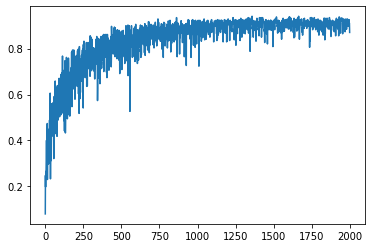

In [7]:
plt.plot(history.history['val_accuracy'])

In [8]:
from sklearn.metrics import confusion_matrix

[[52  1  0  0  0  0  1  0  1]
 [ 0 47  0  0  0  0  0  0  0]
 [ 0  0 18  8  0  0  1  0  0]
 [ 1  0  2 39  1  0  0  0  0]
 [ 2  0  0  2 47  0  0  0  0]
 [ 0  1  0  0  0 15  0  0  0]
 [14  3  2  0  0  0 39  0  0]
 [ 0  1  0  0  0  0  0 14  0]
 [ 0  0  0  3  0  0  0  0 25]]


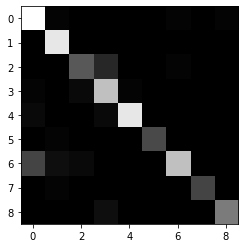

In [9]:
y_pred = model.predict(X_test)
y_p = [np.argmax(yy) for yy in y_pred]
y_tp = [np.argmax(yy) for yy in y_test]
plt.imshow(confusion_matrix(y_tp, y_p), 'gray')
print(confusion_matrix(y_tp, y_p))

In [10]:
with open('./Checkpoints/Model/fruit_classify.json', 'w') as model_write:
    model_write.write(model.to_json())
model.save('./Checkpoints/Weight/fruit_classify.h5')